# Análisis Exploratorio

**Librerias**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv("tuberculosis.csv")

In [ ]:
df.head()

,country,year,iso2,iso3,cases,gender,agegroup,method,population
0,Afghanistan,1995,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo,17586073
1,Afghanistan,1996,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo,18415307
2,Afghanistan,1997,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo,19021226
3,Afghanistan,1998,AF,AFG,30.0,masculino,0-14,esputo pulmonar positivo,19496836
4,Afghanistan,1999,AF,AFG,8.0,masculino,0-14,esputo pulmonar positivo,19987071


 *Cantidad de países y rango de años*

In [ ]:
print(f"Año de inicio: {df['year'].min()}")
print(f"Año de finalizacion: {df['year'].max()}")
print(f"Cantidad de paises: {df['country'].nunique()}")

Año de inicio: 1995
Año de finalizacion: 2013
Cantidad de paises: 217


*Tasa global promedio por cada 100,000 habitantes*

In [ ]:
df["tasa"] = (df["cases"] / df["population"]) * 100000
tasa_global = df["tasa"].mean()
print(f"Tasa global promedio: {tasa_global:.2f} por 100,000 hab.")

Tasa global promedio: 0.64 por 100,000 hab.


*Número de casos por metodo y porcentaje del total*

In [ ]:
by_method = df.groupby("method", as_index=False)["cases"].sum()
by_method["percent_of_total"] = 100 * by_method["cases"] / by_method["cases"].sum()
by_method

,method,cases,percent_of_total
0,esputo pulmonar negativo,6279526.0,14.545284
1,esputo pulmonar positivo,31701213.0,73.429611
2,extrapulmonar,1986179.0,4.600592
3,recaida,3205329.0,7.424513


*Número de casos por género y porcentaje del total*

In [ ]:
by_gender = df.groupby("gender", as_index=False)["cases"].sum()
by_gender["percent_of_total"] = 100 * by_gender["cases"] / by_gender["cases"].sum()
by_gender

,gender,cases,percent_of_total
0,femenino,15818663.0,36.640815
1,masculino,27353584.0,63.359185


*Número de casos por grupo de edad y su porcentaje del total*

In [ ]:
by_agegroup = df.groupby("agegroup", as_index=False)["cases"].sum()
by_agegroup["percent_of_total"] = 100 * by_agegroup["cases"] / by_agegroup["cases"].sum()
by_agegroup.head(10)

,agegroup,cases,percent_of_total
0,0-14,1702349.0,5.065104
1,15-24,7594407.0,22.596106
2,35-44,8720495.0,25.946625
3,45-54,6475709.0,19.267575
4,55-64,4785382.0,14.238242
5,65+,4331019.0,12.886347


*Número de casos por países*

In [ ]:
by_country = df.groupby("country", as_index=False)["cases"].sum()
by_country["percent_of_total"] = 100 * by_country["cases"] / by_country["cases"].sum()
by_country.sort_values(by="cases", ascending=False).head(10)

,country,cases,percent_of_total
42,China,8389839.0,19.433408
88,India,7098552.0,16.442396
177,South Africa,3010272.0,6.972702
89,Indonesia,2909925.0,6.740268
16,Bangladesh,1524034.0,3.530124
211,Viet Nam,965665.0,2.236773
55,Democratic Republic of the Congo,960902.0,2.225740
149,Philippines,952828.0,2.207038
157,Russian Federation,926236.0,2.145443
143,Pakistan,905629.0,2.097711


**Tasa incidencia**  
Por cada 100,000 habitantes  

i = 100000 * cases / poblacion_total

In [ ]:
df.head()

,country,year,iso2,iso3,cases,gender,agegroup,method,population,tasa
0,Afghanistan,1995,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo,17586073,0.000000
1,Afghanistan,1996,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo,18415307,0.000000
2,Afghanistan,1997,AF,AFG,0.0,masculino,0-14,esputo pulmonar positivo,19021226,0.000000
3,Afghanistan,1998,AF,AFG,30.0,masculino,0-14,esputo pulmonar positivo,19496836,0.153871
4,Afghanistan,1999,AF,AFG,8.0,masculino,0-14,esputo pulmonar positivo,19987071,0.040026


In [ ]:
# Afghanistan 2000 masculino 0-14 pulmonar postivo - 1000 cases - 100_000 poblacion
# Afghanistan 2000 femenino 0-14 pulmonar positivo - 500 cases - 100_000 poblacion

# Se propone un dataframe by_country_year
# Afghanistan año 2000 cases 1500 poblacion 100_000 => i = 100_000 * cases / poblacion
# Afghainistan año 2001 cases 1000 poblacion 120_000 => i = 100_000 * cases / poblacion

# Otro dataframe by_year
# año 2000 cases 300 poblacion 1_000_000 => i = 100_000 cases * cases / poblacion

In [ ]:
# by_country_year
by_country_year = df.groupby(["country", "year"], as_index=False).agg(
    {"cases": "sum", "population": "max"}
)

by_country_year["incidencia"] = 100_000 * by_country_year["cases"] / by_country_year["population"]

by_country_year.head(5)

,country,year,cases,population,incidencia
0,Afghanistan,1995,0.0,17586073,0.000000
1,Afghanistan,1996,0.0,18415307,0.000000
2,Afghanistan,1997,128.0,19021226,0.672932
3,Afghanistan,1998,1778.0,19496836,9.119428
4,Afghanistan,1999,745.0,19987071,3.727410


In [ ]:
# by_year
by_year = by_country_year.groupby("year", as_index=False).agg(
    {"cases":"sum", "population": "sum"}
)
by_year["incidencia"] = 100_000 * by_year["cases"] / by_year["population"]

by_year

,year,cases,population,incidencia
0,1995,505717.0,5703289735,8.867110
1,1996,628318.0,5781863871,10.867049
2,1997,724163.0,5858936095,12.359974
3,1998,830998.0,5934972576,14.001716
4,1999,986176.0,6010587100,16.407316
5,2000,1148463.0,6086267209,18.869743
6,2001,1227501.0,6162187587,19.919890
7,2002,1512296.0,6239282896,24.238298
8,2003,1849403.0,6315958969,29.281428
9,2004,2172788.0,6393225245,33.985788


## Antes del 2009

In [ ]:
by_year_before_2019 = by_year[by_year["year"] < 2009]
by_year_before_2019

,year,cases,population,incidencia
0,1995,505717.0,5703289735,8.867110
1,1996,628318.0,5781863871,10.867049
2,1997,724163.0,5858936095,12.359974
3,1998,830998.0,5934972576,14.001716
4,1999,986176.0,6010587100,16.407316
5,2000,1148463.0,6086267209,18.869743
6,2001,1227501.0,6162187587,19.919890
7,2002,1512296.0,6239282896,24.238298
8,2003,1849403.0,6315958969,29.281428
9,2004,2172788.0,6393225245,33.985788


In [ ]:
# Calcular el cambio en una métrica (Valor final - Valor inicial) / Valor inicial
tasa_incidencia_2009 = 100 * (52.463162 - 8.867110) / 8.867110
tasa_incidencia_2009 # 491% crecimiento del 491% del año 1995 al año 2008

491.6602139817821

In [ ]:
# Calculado automaticamente
# Porcentaje de diferencia from 1995 to 2008
percent_change = 100 * (by_year_before_2019["incidencia"].iloc[-1] - by_year_before_2019["incidencia"].iloc[0]) / by_year_before_2019["incidencia"].iloc[0]
print(f"Cambio de porcentaje de incidencia de 1995 al 2008: {percent_change:.0f}%")

Cambio de porcentaje de incidencia de 1995 al 2008: 492%


**Visualización de datos**

*Distribución de casos por método*

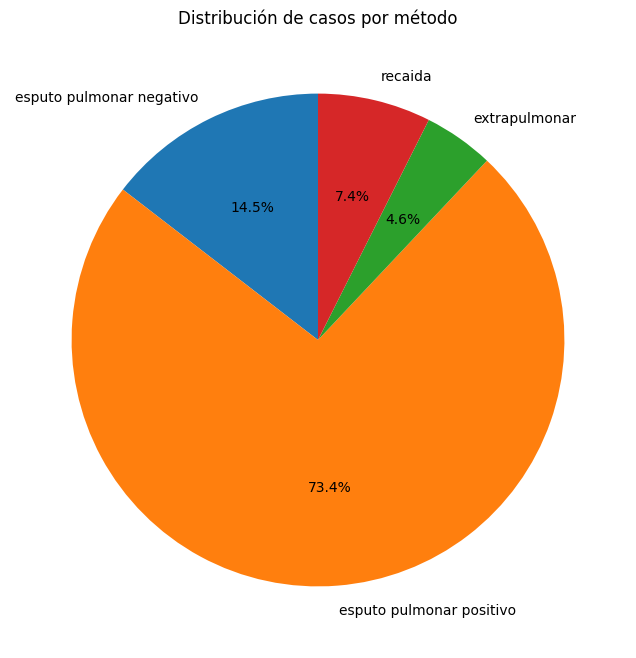

In [ ]:
# Gráfico
plt.figure(figsize=(8, 8))
plt.pie(by_method['cases'], labels=by_method['method'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de casos por método')
plt.show()

*Porcentaje por género*

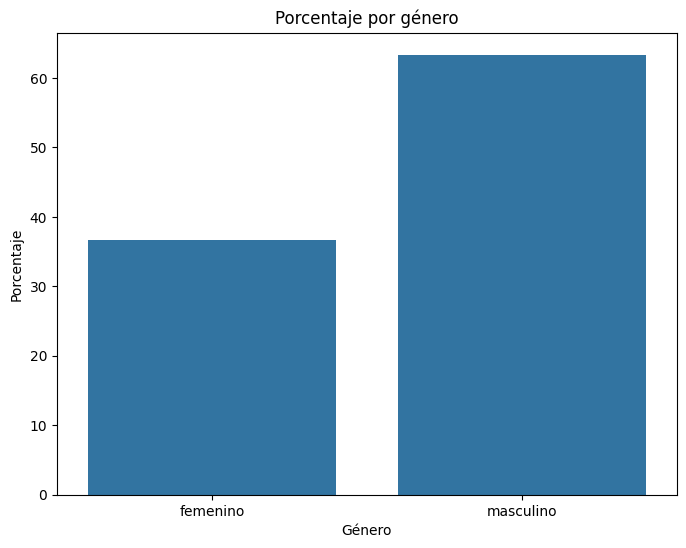

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='percent_of_total', data=by_gender)
plt.title('Porcentaje por género')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.show()

*Porcentaje por grupo de edad*

/tmp/ipython-input-124-2612044734.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




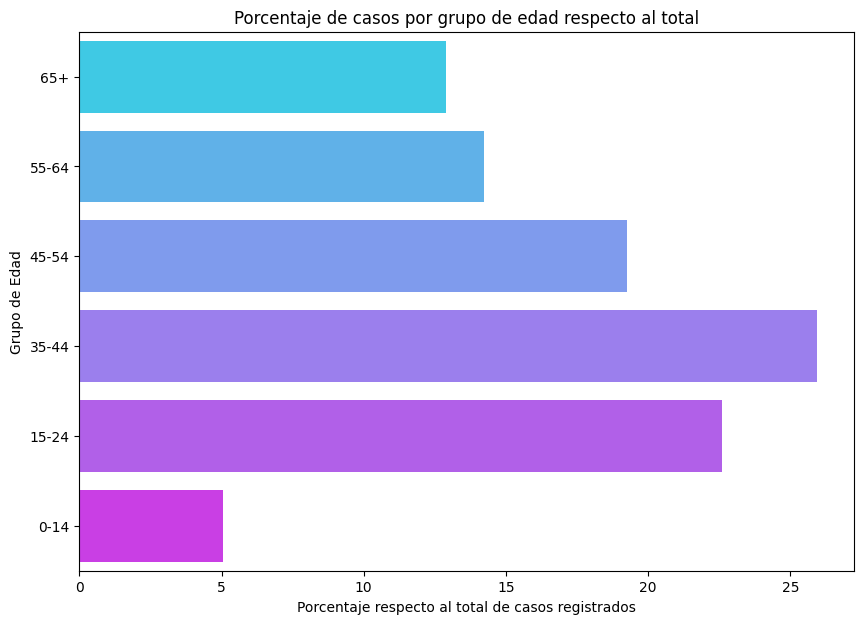

In [ ]:
by_agegroup_sorted = by_agegroup.sort_values(by="agegroup", ascending=False)
plt.figure(figsize=(10, 7))
by_agegroup["percent_of_total"] = 100 * by_agegroup["cases"] / by_agegroup["cases"].sum()
sns.barplot(x='percent_of_total', y='agegroup', data=by_agegroup_sorted, palette='cool')
plt.title('Porcentaje de casos por grupo de edad respecto al total')
plt.xlabel('Porcentaje respecto al total de casos registrados')
plt.ylabel('Grupo de Edad')
plt.show()

*Incidencia de tuberculosis por Año*

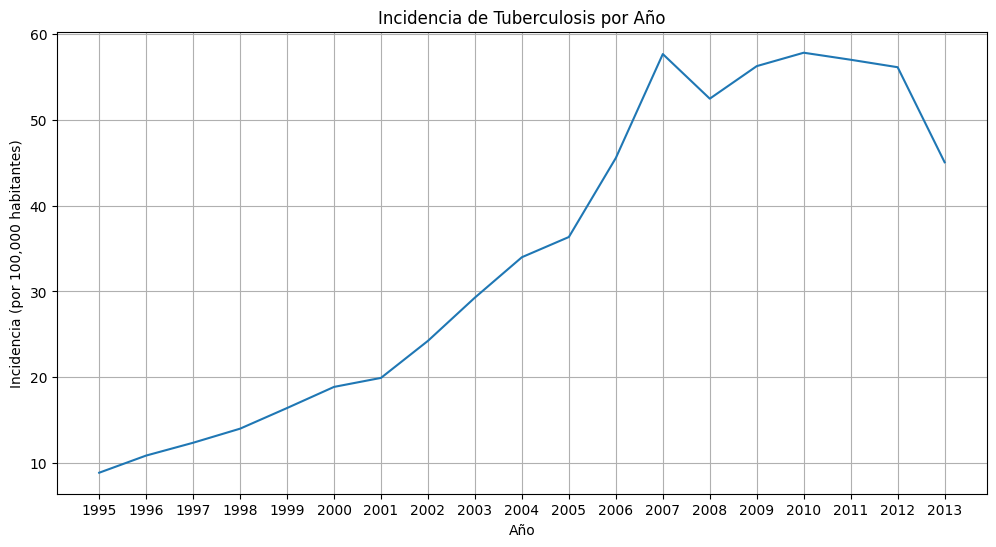

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='incidencia', data=by_year)
plt.title('Incidencia de Tuberculosis por Año')
plt.xlabel('Año')
plt.ylabel('Tassa de Incidencia (por 100,000 habitantes)')
plt.grid(True)
plt.xticks(by_year['year'])
plt.show()